# import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#folder shortcut
path = r'C:\Users\Admin\Documents\CF Tasks\Last Python Advanced Analytics'

In [4]:
citi = pd.read_csv(os.path.join(path, '02 Data','prepared data', 'citi_3.csv'), index_col = False)

In [5]:
station =pd.read_csv(os.path.join(path, '02 Data','prepared data', 'bike_station.csv'), index_col = False)

In [6]:
station.head()

,Unnamed: 0,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,0,72,40.767272,-73.993929,5.642857
1,1,79,40.719116,-74.006667,4.357143
2,2,82,40.711174,-74.000165,2.185185
3,3,83,40.683826,-73.976323,2.571429
4,4,116,40.741776,-74.001497,8.966667


In [9]:
columns_to_drop=['Unnamed: 0']

In [10]:
station=station.drop(columns_to_drop, axis=1)

In [11]:
station

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,72,40.767272,-73.993929,5.642857
1,79,40.719116,-74.006667,4.357143
2,82,40.711174,-74.000165,2.185185
3,83,40.683826,-73.976323,2.571429
4,116,40.741776,-74.001497,8.966667
...,...,...,...,...
325,2017,40.750224,-73.971214,3.000000
326,2021,40.759291,-73.988597,5.357143
327,2022,40.758491,-73.959206,3.310345
328,2023,40.759681,-73.970314,3.217391


In [12]:
citi.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'trip_id', 'weekday', 'start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride'],
      dtype='object')

In [15]:
citi_1=citi[['weekday','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride']]

In [16]:
citi_1

,weekday,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42988,Sat,15,435,W 21 St & 6 Ave,40.741740,-73.994156,448,W 37 St & 10 Ave,40.756604,-73.997901,975,Subscriber,1973.0,1,2013-09-28 15:30:14,2013-09-28 15:46:29
42989,Sun,16,224,Spruce St & Nassau St,40.711464,-74.005524,301,E 2 St & Avenue B,40.722174,-73.983688,1541,Subscriber,1975.0,1,2013-09-01 16:27:11,2013-09-01 16:52:52
42990,Sat,17,261,Johnson St & Gold St,40.694749,-73.983625,151,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970.0,2,2013-09-14 17:32:26,2013-09-14 17:52:17
42991,Sat,18,402,Broadway & E 22 St,40.740343,-73.989551,524,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961.0,2,2013-09-07 18:08:21,2013-09-07 18:25:51


# clean data - look for outliers extreme values

In [17]:
citi_1.describe()

,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,gender
count,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000
mean,14.085316,437.205545,40.734477,-73.990948,434.577094,40.734070,-73.991242,770.502105,1975.674459,1.247854
std,4.932889,340.848654,0.019598,0.012367,332.801118,0.019603,0.012375,523.444233,10.938735,0.431880
min,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1924.000000,0.000000
25%,10.000000,304.000000,40.721101,-74.000040,305.000000,40.720828,-74.000271,395.000000,1968.000000,1.000000
50%,15.000000,402.000000,40.736245,-73.990765,402.000000,40.735877,-73.990985,621.000000,1978.000000,1.000000
75%,18.000000,485.000000,40.749718,-73.981948,483.000000,40.749013,-73.982578,999.000000,1984.000000,1.000000
max,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,2.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_17436\1648765124.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(citi_1['trip_duration'], bins=60) # Shows extreme values


<Axes: xlabel='trip_duration', ylabel='Density'>

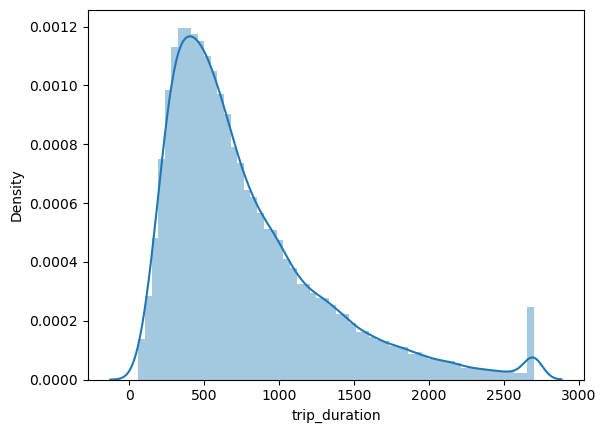

In [18]:
sns.distplot(citi_1['trip_duration'], bins=60) # Shows extreme values



In [19]:
# Define data types for specific columns
data_types = {
    'start_of_ride': 'datetime64'
}

In [20]:
file_path = os.path.join(path, '02 Data','prepared data','citi_3.csv')

In [21]:
parse_dates = ['start_of_ride']

In [22]:
citi_1 = pd.read_csv(file_path, parse_dates=parse_dates)

In [23]:
# amount of rides taken on each hour of each day
hour_counts = citi_1.groupby(['start_hour',citi_1['start_of_ride'].dt.date])['start_of_ride'].count()

In [24]:
hour_counts

start_hour  start_of_ride
0           2013-09-01       15
            2013-09-02       15
            2013-09-03        5
            2013-09-04        9
            2013-09-05       13
                             ..
23          2013-09-26       38
            2013-09-27       44
            2013-09-28       48
            2013-09-29       21
            2013-09-30       17
Name: start_of_ride, Length: 711, dtype: int64

In [25]:
# average rides per hour
avg_rides_per_hour = hour_counts.groupby('start_hour').mean().reset_index()

In [26]:
avg_rides_per_hour

,start_hour,start_of_ride
0,0,14.000000
1,1,8.866667
2,2,5.586207
3,3,3.692308
4,4,2.777778
5,5,6.724138
6,6,29.633333
7,7,66.000000
8,8,104.233333
9,9,86.600000


In [27]:
day_counts = citi_1.groupby('weekday')['start_of_ride'].count().reset_index()

In [28]:
day_counts

,weekday,start_of_ride
0,Fri,6594
1,Mon,6797
2,Sat,4965
3,Sun,5506
4,Thu,6212
5,Tue,6429
6,Wed,6490


In [29]:
day_hour_counts = citi_1.groupby([ 'weekday','start_hour'])['start_of_ride'].count()

In [30]:
day_hour_counts

weekday  start_hour
Fri      0              48
         1              36
         2              23
         3              10
         4              10
                      ... 
Wed      19            479
         20            297
         21            213
         22            188
         23            103
Name: start_of_ride, Length: 168, dtype: int64

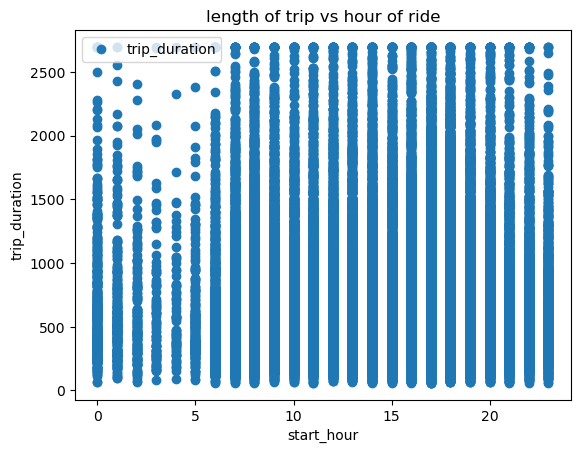

In [31]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

citi_1.plot(x = 'start_hour', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('length of trip vs hour of ride')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

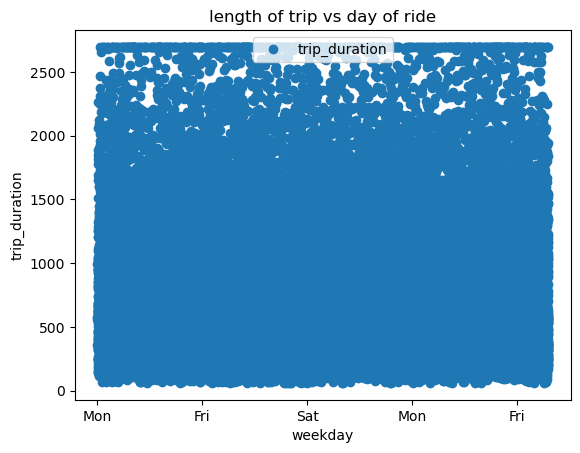

In [35]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

citi_1.plot(x = 'weekday', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('length of trip vs day of ride')  
plt.xlabel('weekday')  
plt.ylabel('trip_duration')  
plt.show()

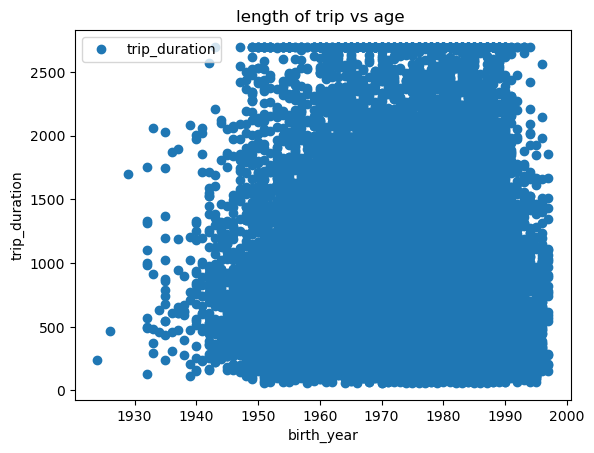

In [36]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

citi_1.plot(x = 'birth_year', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('length of trip vs age ')  
plt.xlabel('birth_year')  
plt.ylabel('trip_duration')  
plt.show()

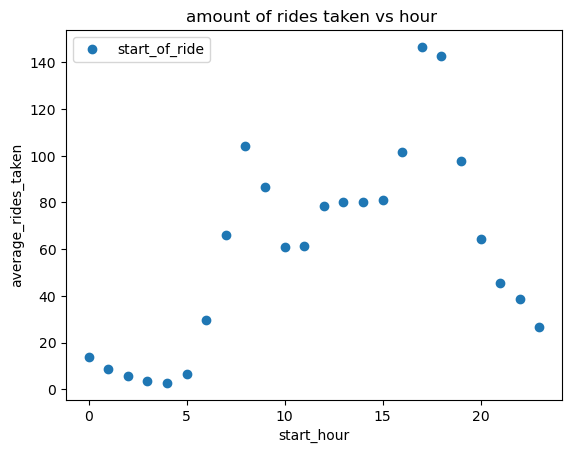

In [37]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

avg_rides_per_hour.plot(x = 'start_hour', y='start_of_ride',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('amount of rides taken vs hour ')  
plt.xlabel('start_hour')  
plt.ylabel('average_rides_taken')  
plt.show()

In [38]:
avg_rides_per_hour

,start_hour,start_of_ride
0,0,14.000000
1,1,8.866667
2,2,5.586207
3,3,3.692308
4,4,2.777778
5,5,6.724138
6,6,29.633333
7,7,66.000000
8,8,104.233333
9,9,86.600000


In [39]:
citi_1.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'trip_id', 'weekday', 'start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride'],
      dtype='object')

In [40]:
ride_counts = pd.get_dummies(citi_1, columns=['weekday', 'start_hour'], drop_first=True)

In [41]:
ride_counts

,Unnamed: 0.1,Unnamed: 0,trip_id,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_hour_14,start_hour_15,start_hour_16,start_hour_17,start_hour_18,start_hour_19,start_hour_20,start_hour_21,start_hour_22,start_hour_23
0,0,0,LnQzQk,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,...,0,0,0,0,1,0,0,0,0,0
1,1,1,IL9boN,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,...,0,0,0,0,1,0,0,0,0,0
2,2,2,46clGB,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,...,0,0,0,0,0,1,0,0,0,0
3,3,3,v7vdFt,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,...,0,0,0,0,0,0,0,0,0,0
4,4,5,HbKJBz,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42988,42988,49992,Ayusua,435,W 21 St & 6 Ave,40.741740,-73.994156,448,W 37 St & 10 Ave,40.756604,...,0,1,0,0,0,0,0,0,0,0
42989,42989,49994,xrF3KL,224,Spruce St & Nassau St,40.711464,-74.005524,301,E 2 St & Avenue B,40.722174,...,0,0,1,0,0,0,0,0,0,0
42990,42990,49996,XGB7JU,261,Johnson St & Gold St,40.694749,-73.983625,151,Cleveland Pl & Spring St,40.721816,...,0,0,0,1,0,0,0,0,0,0
42991,42991,49997,vFs2HS,402,Broadway & E 22 St,40.740343,-73.989551,524,W 43 St & 6 Ave,40.755273,...,0,0,0,0,1,0,0,0,0,0


In [42]:
ride_counts.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'trip_id', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'start_hour_1', 'start_hour_2',
       'start_hour_3', 'start_hour_4', 'start_hour_5', 'start_hour_6',
       'start_hour_7', 'start_hour_8', 'start_hour_9', 'start_hour_10',
       'start_hour_11', 'start_hour_12', 'start_hour_13', 'start_hour_14',
       'start_hour_15', 'start_hour_16', 'start_hour_17', 'start_hour_18',
       'start_hour_19', 'start_hour_20', 'start_hour_21', 'start_hour_22',
       'start_hour_23'],
      dtype='object')

In [43]:
# rides per hour count
rides_per_hour_count = hour_counts.groupby('start_hour').count().reset_index()


In [44]:
# amount of rides taken on each hour of each day
hour_counts_1 = citi_1.groupby('start_hour')['start_of_ride'].count()

In [45]:
hour_counts_1

start_hour
0      420
1      266
2      162
3       96
4       75
5      195
6      889
7     1980
8     3127
9     2598
10    1827
11    1841
12    2353
13    2408
14    2401
15    2436
16    3046
17    4398
18    4280
19    2930
20    1932
21    1371
22    1159
23     803
Name: start_of_ride, dtype: int64

In [46]:
hourly_aggregated = citi_1.groupby('start_hour').agg({
    'start_of_ride': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()


In [47]:
hourly_aggregated

,start_hour,start_of_ride,trip_duration
0,0,420,748.716667
1,1,266,702.657895
2,2,162,659.561728
3,3,96,687.020833
4,4,75,667.106667
5,5,195,605.348718
6,6,889,648.613048
7,7,1980,727.038384
8,8,3127,756.595459
9,9,2598,728.346035


In [48]:
hourly_aggregated.rename(columns={'start_of_ride': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

In [49]:
hourly_aggregated

,start_hour,ride_count,avg_trip_duration
0,0,420,748.716667
1,1,266,702.657895
2,2,162,659.561728
3,3,96,687.020833
4,4,75,667.106667
5,5,195,605.348718
6,6,889,648.613048
7,7,1980,727.038384
8,8,3127,756.595459
9,9,2598,728.346035


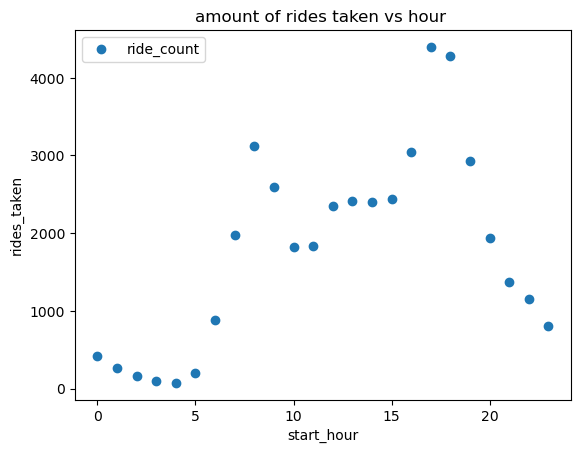

In [50]:
hourly_aggregated.plot(x = 'start_hour', y='ride_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('amount of rides taken vs hour ')  
plt.xlabel('start_hour')  
plt.ylabel('rides_taken')  
plt.show()

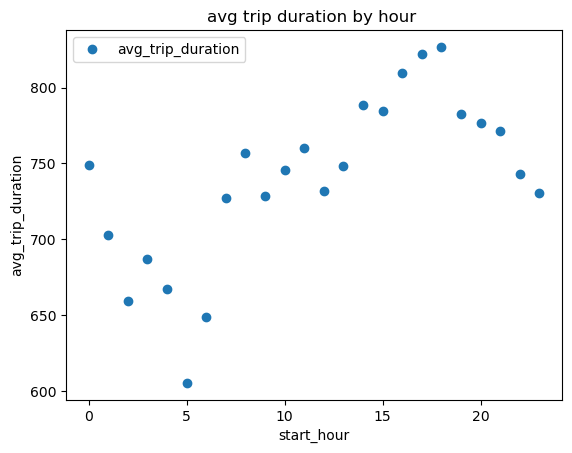

In [51]:
hourly_aggregated.plot(x = 'start_hour', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('avg trip duration by hour ')  
plt.xlabel('start_hour')  
plt.ylabel('avg_trip_duration')  
plt.show()

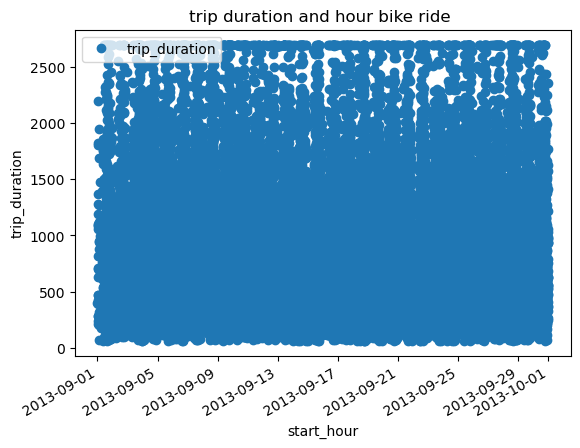

In [52]:
citi_1.plot(x = 'start_of_ride', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('trip duration and hour bike ride ')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [53]:
citi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.1             42993 non-null  int64         
 1   Unnamed: 0               42993 non-null  int64         
 2   trip_id                  42993 non-null  object        
 3   weekday                  42993 non-null  object        
 4   start_hour               42993 non-null  int64         
 5   start_station_id         42993 non-null  int64         
 6   start_station_name       42993 non-null  object        
 7   start_station_latitude   42993 non-null  float64       
 8   start_station_longitude  42993 non-null  float64       
 9   end_station_id           42993 non-null  int64         
 10  end_station_name         42993 non-null  object        
 11  end_station_latitude     42993 non-null  float64       
 12  end_station_longitude    42993 n

In [54]:
# Define data types for specific columns
data_types = {
    'start_of_ride': 'datetime64'
}

In [55]:
file_path_1 = os.path.join(path, '02 Data','prepared data','citi_3.csv')

In [56]:
parse_dates = ['start_of_ride']

In [57]:
citi_1 = pd.read_csv(file_path_1, parse_dates=parse_dates)

In [58]:
citi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.1             42993 non-null  int64         
 1   Unnamed: 0               42993 non-null  int64         
 2   trip_id                  42993 non-null  object        
 3   weekday                  42993 non-null  object        
 4   start_hour               42993 non-null  int64         
 5   start_station_id         42993 non-null  int64         
 6   start_station_name       42993 non-null  object        
 7   start_station_latitude   42993 non-null  float64       
 8   start_station_longitude  42993 non-null  float64       
 9   end_station_id           42993 non-null  int64         
 10  end_station_name         42993 non-null  object        
 11  end_station_latitude     42993 non-null  float64       
 12  end_station_longitude    42993 n

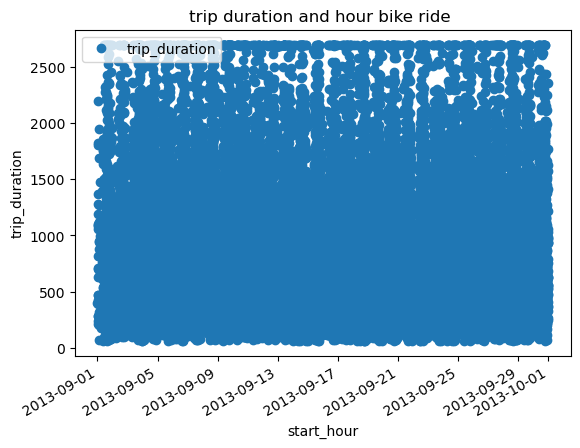

In [59]:
citi_1.plot(x = 'start_of_ride', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('trip duration and hour bike ride ')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [60]:
hourly_aggregated = citi_1.groupby('start_hour').agg({
    'start_of_ride': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()


In [61]:
hourly_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   start_hour     24 non-null     int64  
 1   start_of_ride  24 non-null     int64  
 2   trip_duration  24 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 708.0 bytes


In [62]:
hourly_aggregated.rename(columns={'start_of_ride': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

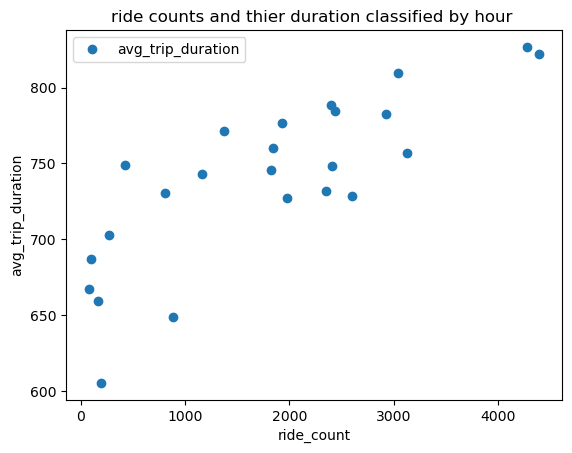

In [63]:
hourly_aggregated.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by hour ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

# During busier hours where rides more often occur, that are longer rides

In [64]:
#using iqr method to look for outliers

In [65]:
q1=hourly_aggregated['ride_count'].quantile(0.25)#first Quartile
q3=hourly_aggregated['ride_count'].quantile(0.75)#third Quartile
iqr = q3-q1

In [66]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [67]:
outliers = hourly_aggregated[(hourly_aggregated['ride_count'] < lower_bound) | (hourly_aggregated['ride_count'] > upper_bound)]

In [68]:
outliers

,start_hour,ride_count,avg_trip_duration


In [69]:
q1=hourly_aggregated['avg_trip_duration'].quantile(0.25)#first Quartile
q3=hourly_aggregated['avg_trip_duration'].quantile(0.75)#third Quartile
iqr = q3-q1

In [70]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [71]:
outliers_1 = hourly_aggregated[(hourly_aggregated['avg_trip_duration'] < lower_bound) | (hourly_aggregated['avg_trip_duration'] > upper_bound)]

In [72]:
# there are outliers!
outliers_1

,start_hour,ride_count,avg_trip_duration
5,5,195,605.348718


In [73]:
#finding outliers in the main dateset
q1=citi_1['trip_duration'].quantile(0.25)#first Quartile
q3=citi_1['trip_duration'].quantile(0.75)#third Quartile
iqr = q3-q1

In [74]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [75]:
outliers_2 = citi_1[(citi_1['trip_duration'] < lower_bound) | (citi_1['trip_duration'] > upper_bound)]

In [76]:
outliers_2

,Unnamed: 0.1,Unnamed: 0,trip_id,weekday,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride
27,27,31,1VBu0K,Thu,16,471,Grand St & Havemeyer St,40.712868,-73.956981,388,W 26 St & 10 Ave,40.749718,-74.002950,2057,Subscriber,1954.0,1,2013-09-19 16:35:39,2013-09-19 17:09:56
55,55,63,Wj4Vjl,Wed,17,469,Broadway & W 53 St,40.763441,-73.982681,313,Washington Ave & Park Ave,40.696102,-73.967510,2262,Subscriber,1979.0,2,2013-09-11 17:11:27,2013-09-11 17:49:09
179,179,208,31hd9Q,Mon,14,342,Columbia St & Rivington St,40.717400,-73.980166,342,Columbia St & Rivington St,40.717400,-73.980166,2093,Subscriber,1960.0,2,2013-09-09 14:38:39,2013-09-09 15:13:32
183,183,212,Lnt7Y8,Tue,10,391,Clark St & Henry St,40.697601,-73.993446,486,Broadway & W 29 St,40.746201,-73.988557,2124,Subscriber,1957.0,1,2013-09-24 10:32:52,2013-09-24 11:08:16
197,197,231,iJUGwa,Thu,17,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,2251,Subscriber,1963.0,1,2013-09-05 17:31:47,2013-09-05 18:09:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42837,42837,49809,EBUEBi,Sun,18,448,W 37 St & 10 Ave,40.756604,-73.997901,514,12 Ave & W 40 St,40.760875,-74.002777,2697,Subscriber,1990.0,2,2013-09-08 18:32:27,2013-09-08 19:22:58
42902,42902,49886,oKpUU5,Tue,7,278,Concord St & Bridge St,40.697666,-73.984764,352,W 56 St & 6 Ave,40.763406,-73.977225,2252,Subscriber,1976.0,2,2013-09-10 07:47:03,2013-09-10 08:24:35
42903,42903,49887,RKyroT,Sun,16,242,Flushing Ave & Carlton Ave,40.697883,-73.973503,526,E 33 St & 5 Ave,40.747659,-73.984907,2697,Subscriber,1965.0,1,2013-09-22 16:10:00,2013-09-22 17:25:53
42909,42909,49893,u1yEkP,Mon,16,493,W 45 St & 6 Ave,40.756800,-73.982912,501,FDR Drive & E 35 St,40.744219,-73.971212,2697,Subscriber,1968.0,1,2013-09-09 16:13:08,2013-09-09 17:13:59


In [77]:
outliers_2.shape

(1976, 19)

In [78]:
citi_1.shape

(42993, 19)

In [79]:
#removing outliers
filtered_citi = citi_1[(citi_1['trip_duration'] >= lower_bound) & (citi_1['trip_duration'] <= upper_bound)]

In [80]:
filtered_citi.shape

(41017, 19)

# Observing is there are other variables I want to test

In [82]:
day_counts = citi_1.groupby('weekday')['start_of_ride'].count().reset_index()

In [83]:
day_counts

,weekday,start_of_ride
0,Fri,6594
1,Mon,6797
2,Sat,4965
3,Sun,5506
4,Thu,6212
5,Tue,6429
6,Wed,6490


In [84]:
daily_aggregated = citi_1.groupby('weekday').agg({
    'start_of_ride': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()


In [85]:
daily_aggregated

,weekday,start_of_ride,trip_duration
0,Fri,6594,764.061723
1,Mon,6797,761.585552
2,Sat,4965,804.035045
3,Sun,5506,814.107701
4,Thu,6212,750.656632
5,Tue,6429,749.886452
6,Wed,6490,763.153621


In [86]:
daily_aggregated.rename(columns={'start_of_ride': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

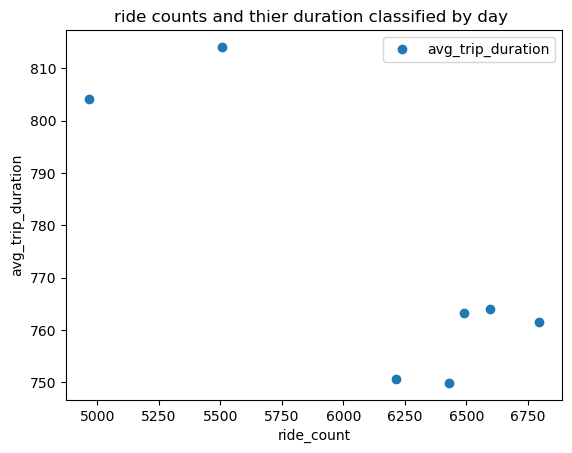

In [87]:
daily_aggregated.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by day ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

# Finally decided to do rides counts in an hour and trip duration
# Reshape the variables into NumPy arrays and put them into separate objects.

In [88]:
X = hourly_aggregated['ride_count'].values.reshape(-1,1)
y = hourly_aggregated['avg_trip_duration'].values.reshape(-1,1)

In [89]:
X

array([[ 420],
       [ 266],
       [ 162],
       [  96],
       [  75],
       [ 195],
       [ 889],
       [1980],
       [3127],
       [2598],
       [1827],
       [1841],
       [2353],
       [2408],
       [2401],
       [2436],
       [3046],
       [4398],
       [4280],
       [2930],
       [1932],
       [1371],
       [1159],
       [ 803]], dtype=int64)

In [90]:
y

array([[748.71666667],
       [702.65789474],
       [659.5617284 ],
       [687.02083333],
       [667.10666667],
       [605.34871795],
       [648.61304837],
       [727.03838384],
       [756.59545891],
       [728.34603541],
       [745.68472906],
       [760.06518197],
       [732.08372291],
       [748.19684385],
       [788.49979175],
       [784.35057471],
       [809.88345371],
       [822.30832196],
       [826.91121495],
       [782.3105802 ],
       [776.41252588],
       [771.61050328],
       [742.78947368],
       [730.1992528 ]])

In [91]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [92]:
# Create a regression object.

regression = LinearRegression() 

In [93]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [94]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_predicted = regression.predict(X_test)

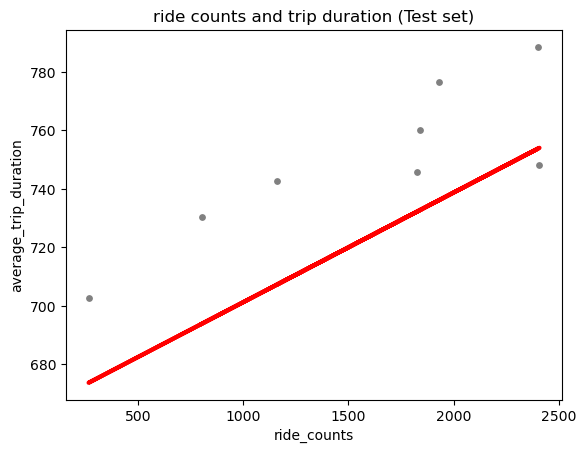

In [95]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('ride counts and trip duration (Test set)')
plot_test.xlabel('ride_counts')
plot_test.ylabel('average_trip_duration')
plot_test.show()

# the regression line appears to have a positive regression meaning that the more rides that occur in an occur mean longer average rides.  However while the line is on a positive slope the line isnt that close to the plots

In [96]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [97]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03746822]]
Mean squared error:  901.4575617946246
R2 score:  -0.44678846872967615


In [99]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,760.065182,732.755282
1,745.684729,732.230727
2,742.789474,707.201956
3,788.499792,753.737485
4,776.412526,736.164890
5,702.657895,673.742836
6,748.196844,753.999763
7,730.199253,693.863270


# When you compare the actual data with predicted, it is pretty far off and we are talking about seconds.  I think another indicator is the MSE score.  Being that signifigantly high I think is an indicator that its not a good relationship

# possible bias could be rides that were not recorded accurately, whether it was cut short or never logged out and rides were too long. 

# With all of this I think for a linear regression to have 2 numeric variables and have a relationship is tough.  I feel for this data set it is a bit more categorical. rides and days of week or rides and hour.  subscribers being male or female.  age of subscriber. etc.

In [100]:
# saving to csv
citi_1.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_4.csv'))

# In the above, I removed outliers with the IQR method so I am doing it all again to see it if reads different

In [101]:
hourly_aggregated_filtered = filtered_citi.groupby('start_hour').agg({
    'start_of_ride': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()


In [102]:
hourly_aggregated_filtered

,start_hour,start_of_ride,trip_duration
0,0,403,677.868486
1,1,257,647.210117
2,2,158,620.936709
3,3,90,584.422222
4,4,73,616.589041
5,5,191,570.586387
6,6,863,598.979143
7,7,1908,668.484277
8,8,3023,705.284155
9,9,2504,668.774760


In [103]:
hourly_aggregated_filtered.rename(columns={'start_of_ride': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

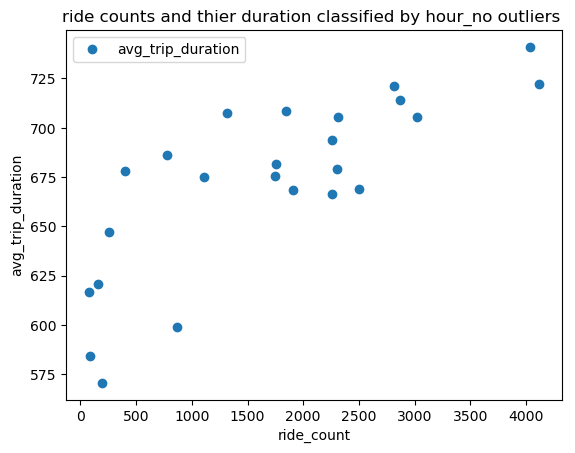

In [104]:
hourly_aggregated_filtered.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by hour_no outliers ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

In [105]:
X_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['avg_trip_duration'].values.reshape(-1,1)

In [106]:
# Split data into a training set and a test set.

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

In [107]:
# Create a regression object.

regression = LinearRegression() 

In [108]:
# Fit the regression object onto the training set.

regression.fit(X_1_train, y_1_train)

LinearRegression()

In [109]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_1_predicted = regression.predict(X_1_test)

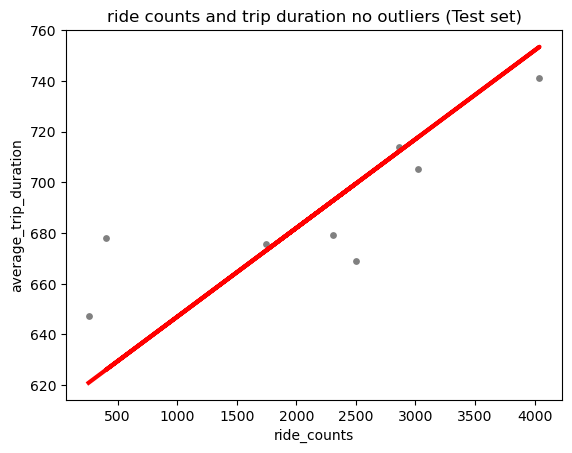

In [110]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts and trip duration no outliers (Test set)')
plot_test_1.xlabel('ride_counts')
plot_test_1.ylabel('average_trip_duration')
plot_test_1.show()

# still a positive regression.  doesnt look any better visually

In [111]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [112]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03503481]]
Mean squared error:  604.4295810846346
R2 score:  0.21346354916799082


# i changed the random state to 42 to make it a more organized randomized set and it changed the r2 score

In [113]:
# Create a dataframe comparing the actual and predicted values of y.

data_1 = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': y_1_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,760.065182,732.755282
1,745.684729,732.230727
2,742.789474,707.201956
3,788.499792,753.737485
4,776.412526,736.164890
5,702.657895,673.742836
6,748.196844,753.999763
7,730.199253,693.863270


In [108]:
# no signifigant difference when outliers were removed

In [114]:
hourly_aggregated_filtered.head()

,start_hour,ride_count,avg_trip_duration
0,0,403,677.868486
1,1,257,647.210117
2,2,158,620.936709
3,3,90,584.422222
4,4,73,616.589041


In [115]:
citi_1.head()

,Unnamed: 0.1,Unnamed: 0,trip_id,weekday,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride
0,0,0,LnQzQk,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28
1,1,1,IL9boN,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34
2,2,2,46clGB,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05
3,3,3,v7vdFt,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58
4,4,5,HbKJBz,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08


In [117]:
citi_clean=citi_1[['weekday','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride']]

In [118]:
hourly_aggregated_filtered.head()

,start_hour,ride_count,avg_trip_duration
0,0,403,677.868486
1,1,257,647.210117
2,2,158,620.936709
3,3,90,584.422222
4,4,73,616.589041


In [119]:
hourly_aggregated_filtered['avg_trip_duration_min']=hourly_aggregated_filtered['avg_trip_duration']/60

In [120]:
hourly_aggregated_filtered

,start_hour,ride_count,avg_trip_duration,avg_trip_duration_min
0,0,403,677.868486,11.297808
1,1,257,647.210117,10.786835
2,2,158,620.936709,10.348945
3,3,90,584.422222,9.740370
4,4,73,616.589041,10.276484
5,5,191,570.586387,9.509773
6,6,863,598.979143,9.982986
7,7,1908,668.484277,11.141405
8,8,3023,705.284155,11.754736
9,9,2504,668.774760,11.146246


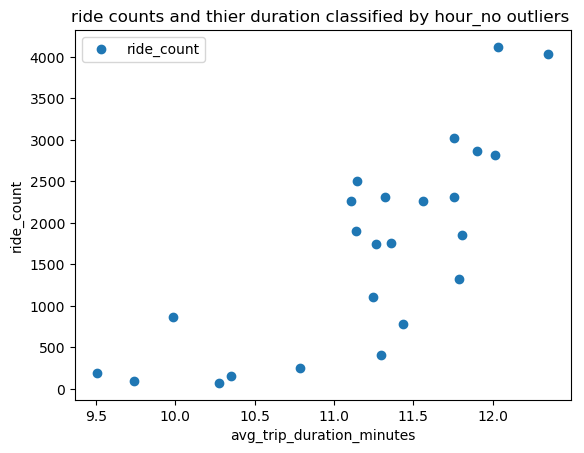

In [121]:
hourly_aggregated_filtered.plot(x = 'avg_trip_duration_min', y='ride_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by hour_no outliers ')  
plt.xlabel('avg_trip_duration_minutes')  
plt.ylabel('ride_count')  
plt.show()

In [122]:
X_1 = hourly_aggregated_filtered['avg_trip_duration_min'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)

In [123]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_1_predicted = regression.predict(X_1_test)

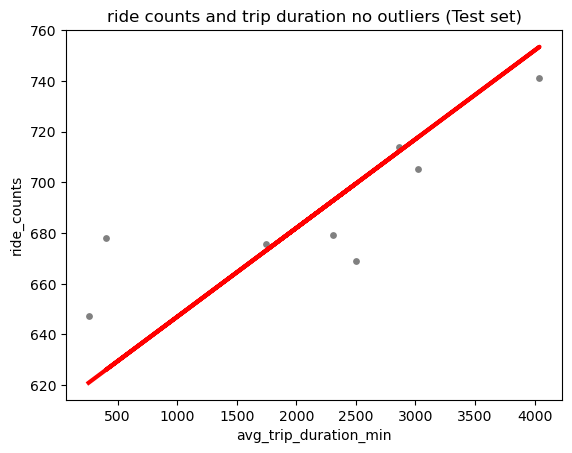

In [124]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts and trip duration no outliers (Test set)')
plot_test_1.xlabel('avg_trip_duration_min')
plot_test_1.ylabel('ride_counts')
plot_test_1.show()

In [125]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [126]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03503481]]
Mean squared error:  604.4295810846346
R2 score:  0.21346354916799082


In [127]:
ride_counts.head()

,Unnamed: 0.1,Unnamed: 0,trip_id,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_hour_14,start_hour_15,start_hour_16,start_hour_17,start_hour_18,start_hour_19,start_hour_20,start_hour_21,start_hour_22,start_hour_23
0,0,0,LnQzQk,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,...,0,0,0,0,1,0,0,0,0,0
1,1,1,IL9boN,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,...,0,0,0,0,1,0,0,0,0,0
2,2,2,46clGB,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,...,0,0,0,0,0,1,0,0,0,0
3,3,3,v7vdFt,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,...,0,0,0,0,0,0,0,0,0,0
4,4,5,HbKJBz,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,...,0,0,0,0,0,0,0,0,1,0


In [128]:
X=hourly_aggregated_filtered[['start_hour','avg_trip_duration']]

In [129]:
import statsmodels.api as sm

In [130]:
X = sm.add_constant(X)

In [131]:
y = hourly_aggregated_filtered['ride_count']

In [132]:
model = sm.OLS(y, X).fit()

In [133]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     17.77
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           3.04e-05
Time:                        13:51:35   Log-Likelihood:                -191.95
No. Observations:                  24   AIC:                             389.9
Df Residuals:                      21   BIC:                             393.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.286e+04   3088.69

In [134]:
# Define the predictor variable (start_hour) and dependent variables (count and avg_trip_duration)
X = hourly_aggregated_filtered['start_hour']
y_count = hourly_aggregated_filtered['ride_count']
y_avg_duration = hourly_aggregated_filtered['avg_trip_duration']


In [135]:
X = sm.add_constant(X)

In [136]:
model_count = sm.OLS(y_count, X).fit()

In [137]:
model_avg_duration = sm.OLS(y_avg_duration, X).fit()


In [138]:
print("Model for Count of Rides:")
print(model_count.summary())
print("\nModel for Average Trip Duration:")
print(model_avg_duration.summary())

Model for Count of Rides:
                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     8.843
Date:                Wed, 30 Aug 2023   Prob (F-statistic):            0.00701
Time:                        13:51:54   Log-Likelihood:                -199.78
No. Observations:                  24   AIC:                             403.6
Df Residuals:                      22   BIC:                             405.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        658.2067    4

In [139]:
X = hourly_aggregated_filtered[['avg_trip_duration', 'start_hour']]
X = sm.add_constant(X)



In [140]:
y = hourly_aggregated_filtered['ride_count']

In [141]:
model = sm.OLS(y, X).fit()

In [142]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     17.77
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           3.04e-05
Time:                        13:52:13   Log-Likelihood:                -191.95
No. Observations:                  24   AIC:                             389.9
Df Residuals:                      21   BIC:                             393.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.286e+04   3088.69

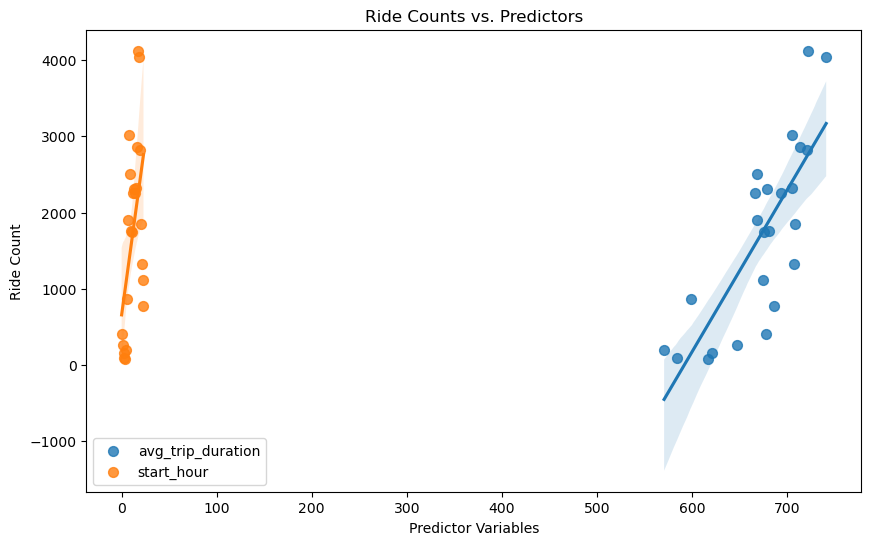

In [143]:
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_trip_duration', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='start_hour', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('Ride Counts vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('Ride Count')
plt.legend()
plt.show()

In [144]:
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]
X = sm.add_constant(X)


In [145]:
y = hourly_aggregated_filtered['avg_trip_duration']

In [146]:
model = sm.OLS(y, X).fit()

In [147]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      avg_trip_duration   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     28.41
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           1.06e-06
Time:                        13:52:32   Log-Likelihood:                -109.22
No. Observations:                  24   AIC:                             224.4
Df Residuals:                      21   BIC:                             228.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        606.9446     10.244     59.248      0.0

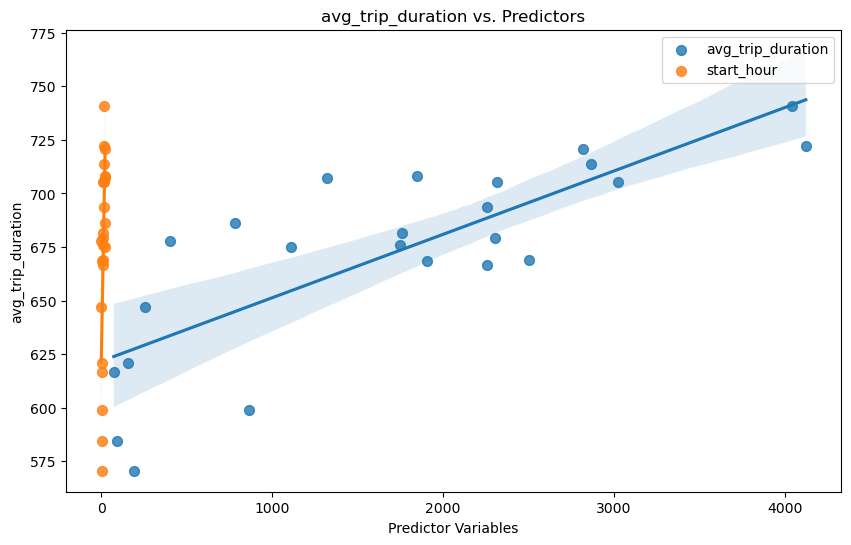

In [148]:
plt.figure(figsize=(10, 6))
sns.regplot(x='ride_count', y='avg_trip_duration', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='start_hour', y='avg_trip_duration', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('avg_trip_duration vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('avg_trip_duration')
plt.legend()
plt.show()

In [149]:
# Reshape the variables into NumPy arrays
X_avg_trip_duration = hourly_aggregated_filtered['ride_count'].values
y_avg_trip_duration = hourly_aggregated_filtered['avg_trip_duration'].values

X_start_hour = hourly_aggregated_filtered['start_hour'].values
y_avg_trip_duration = hourly_aggregated_filtered['avg_trip_duration'].values


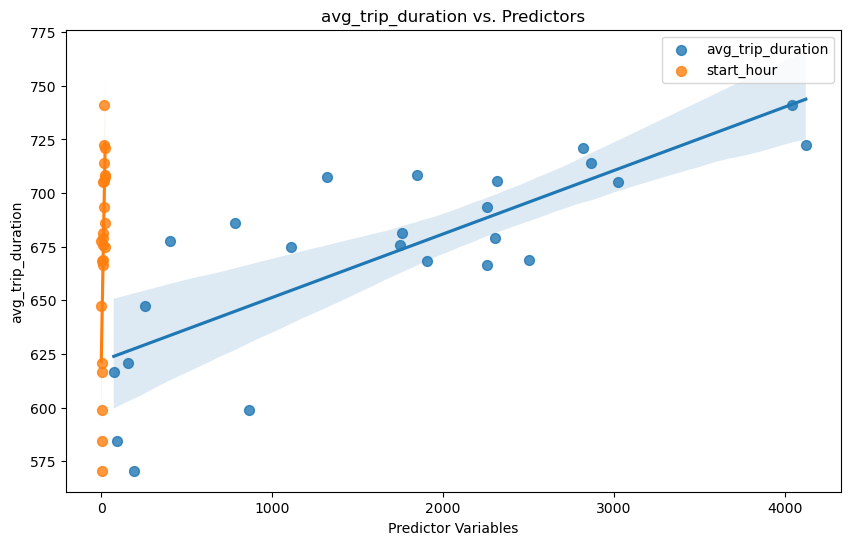

In [150]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_avg_trip_duration, y=y_avg_trip_duration, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x=X_start_hour, y=y_avg_trip_duration, scatter_kws={'s': 50}, label='start_hour')
plt.title('avg_trip_duration vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('avg_trip_duration')
plt.legend()
plt.show()

In [151]:
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]  
y = hourly_aggregated_filtered['avg_trip_duration']  

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

In [153]:
# Create a regression object.

regression = LinearRegression() 

In [154]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [155]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_predicted = regression.predict(X_test)

In [156]:
# Define the predictor variables (X) and the target variable (y)
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]  
y = hourly_aggregated_filtered['avg_trip_duration']  

# Make sure X and y have the same number of data points
assert len(X) == len(y), "X and y must have the same number of data points"

In [157]:
y_predicted = fitted_model.predict(X_test)

NameError: name 'fitted_model' is not defined

In [158]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (24, 2)
Shape of y: (24,)


In [159]:
y

0     677.868486
1     647.210117
2     620.936709
3     584.422222
4     616.589041
5     570.586387
6     598.979143
7     668.484277
8     705.284155
9     668.774760
10    681.419557
11    675.744133
12    666.543401
13    679.187771
14    693.548915
15    705.407599
16    713.957083
17    722.178554
18    741.052215
19    720.935037
20    708.226190
21    707.300986
22    674.930568
23    686.223077
Name: avg_trip_duration, dtype: float64

In [160]:
X

,ride_count,start_hour
0,403,0
1,257,1
2,158,2
3,90,3
4,73,4
5,191,5
6,863,6
7,1908,7
8,3023,8
9,2504,9


In [161]:
citi_1.head()

,Unnamed: 0.1,Unnamed: 0,trip_id,weekday,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride
0,0,0,LnQzQk,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28
1,1,1,IL9boN,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34
2,2,2,46clGB,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05
3,3,3,v7vdFt,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58
4,4,5,HbKJBz,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08


In [163]:
citi_1_clean=citi_1[['weekday','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride']]

In [164]:
citi_1_clean

,weekday,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42988,Sat,15,435,W 21 St & 6 Ave,40.741740,-73.994156,448,W 37 St & 10 Ave,40.756604,-73.997901,975,Subscriber,1973.0,1,2013-09-28 15:30:14,2013-09-28 15:46:29
42989,Sun,16,224,Spruce St & Nassau St,40.711464,-74.005524,301,E 2 St & Avenue B,40.722174,-73.983688,1541,Subscriber,1975.0,1,2013-09-01 16:27:11,2013-09-01 16:52:52
42990,Sat,17,261,Johnson St & Gold St,40.694749,-73.983625,151,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970.0,2,2013-09-14 17:32:26,2013-09-14 17:52:17
42991,Sat,18,402,Broadway & E 22 St,40.740343,-73.989551,524,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961.0,2,2013-09-07 18:08:21,2013-09-07 18:25:51


In [165]:
filtered_citi.head()

,Unnamed: 0.1,Unnamed: 0,trip_id,weekday,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride
0,0,0,LnQzQk,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28
1,1,1,IL9boN,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34
2,2,2,46clGB,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05
3,3,3,v7vdFt,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58
4,4,5,HbKJBz,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08


In [166]:
citi_1_clean=filtered_citi[['weekday','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride']]

In [167]:
# saving to csv
citi_1_clean.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_4.csv'))